### Fake PII data: Exploratory data analysis

This notebook is used to verify the different fake entities before and after the creation of a synthetic dataset / augmented dataset. First part looks at the generation details and stats, second part evaluates the created synthetic dataset after it has been generated.

In [3]:
#!pip install matplotlib
#!pip install wordcloud

In [8]:
import pandas as pd

from presidio_evaluator import InputSample

from collections import Counter
from presidio_evaluator.data_generator.presidio_data_generator import PresidioDataGenerator

import matplotlib.pyplot as plt

%matplotlib inline

1. Evaluate generation logic and the fake PII bank used during generation

In [6]:
pii_df = pd.read_csv(
    "data/austrian_pii_dataset.csv",
    encoding="utf-8",
)

In [14]:
#PresidioDataGenerator.update_fake_name_generator_df(pii_df)
#pii_df.head()

In [11]:
for (name, series) in pii_df.items():
    print(name)
    print("Unique values: {}".format(len(series.unique())))
    print(series.value_counts())
    print("\n**************\n")

nationality
Unique values: 1
nationality
Austrian    3000
Name: count, dtype: int64

**************

number
Unique values: 3000
number
2999    1
0       1
1       1
2       1
3       1
       ..
12      1
11      1
10      1
9       1
8       1
Name: count, Length: 3000, dtype: int64

**************

first_name
Unique values: 559
first_name
Lilian       15
Emanuela     13
Pascal       12
Juliane      12
Denise       12
             ..
Nick          1
Emma          1
Cristiano     1
Leah          1
Josefine      1
Name: count, Length: 559, dtype: int64

**************

middle_initial
Unique values: 26
middle_initial
C    137
X    128
V    126
F    126
B    125
L    123
Z    123
M    123
S    122
A    122
D    119
T    119
Q    117
H    112
K    112
E    111
P    111
U    109
G    109
R    109
I    107
J    106
W    103
N    103
Y    100
O     98
Name: count, dtype: int64

**************

last_name
Unique values: 907
last_name
Sommer       12
Fellner      11
Fischer      10
Kager        

In [12]:
from wordcloud import WordCloud


def series_to_wordcloud(series):
    freqs = series.value_counts()
    wordcloud = WordCloud(
        background_color="white", width=800, height=400
    ).generate_from_frequencies(freqs)
    fig = plt.figure(figsize=(16, 8))
    plt.suptitle("{} word cloud".format(series.name))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

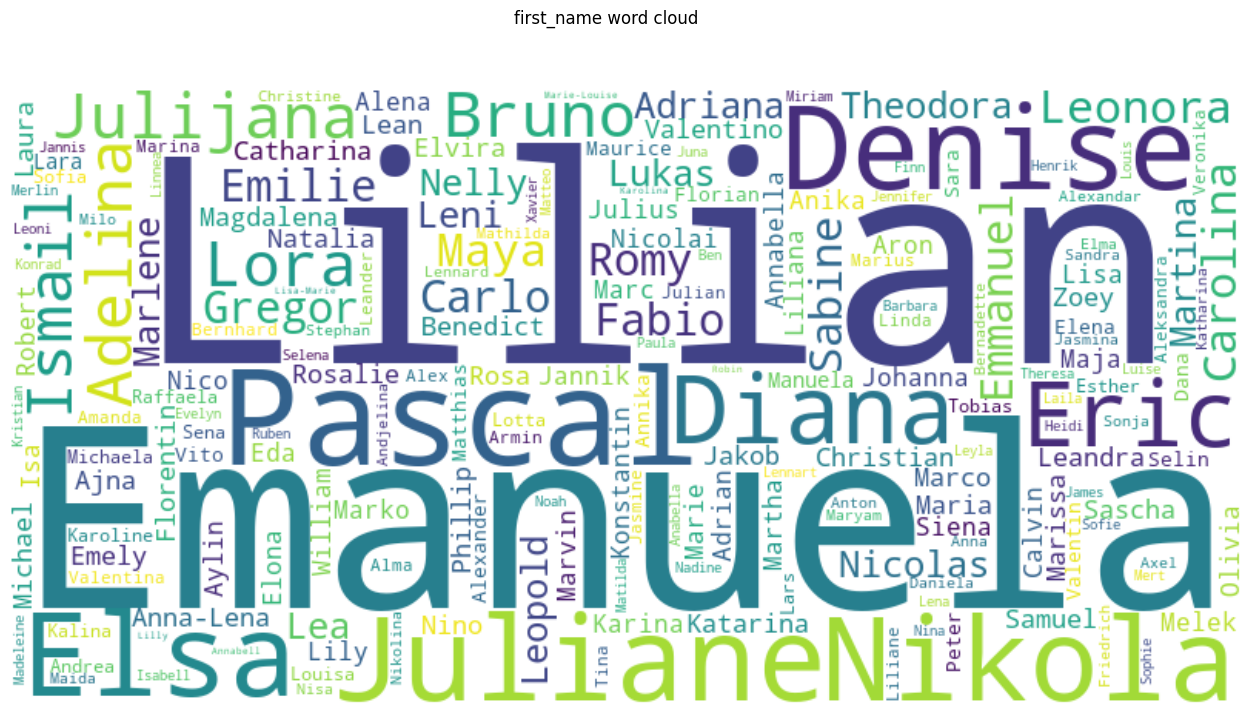

In [13]:
series_to_wordcloud(pii_df.first_name)

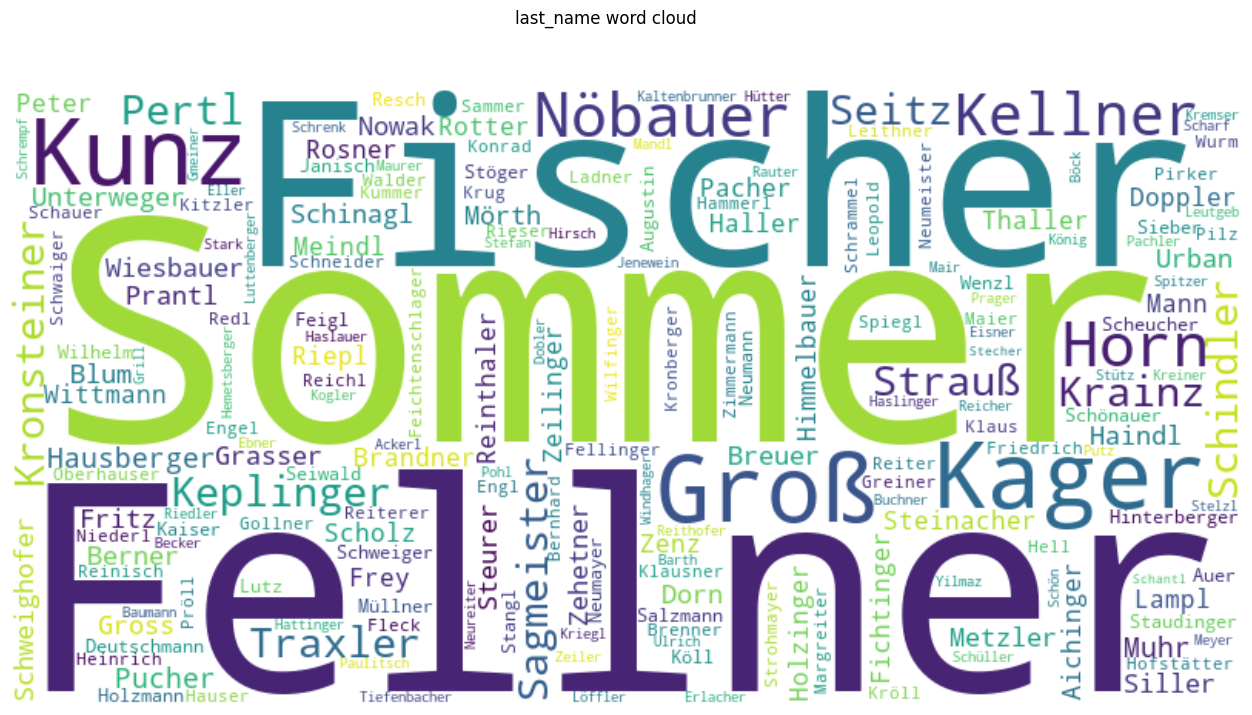

In [15]:
series_to_wordcloud(pii_df.last_name)

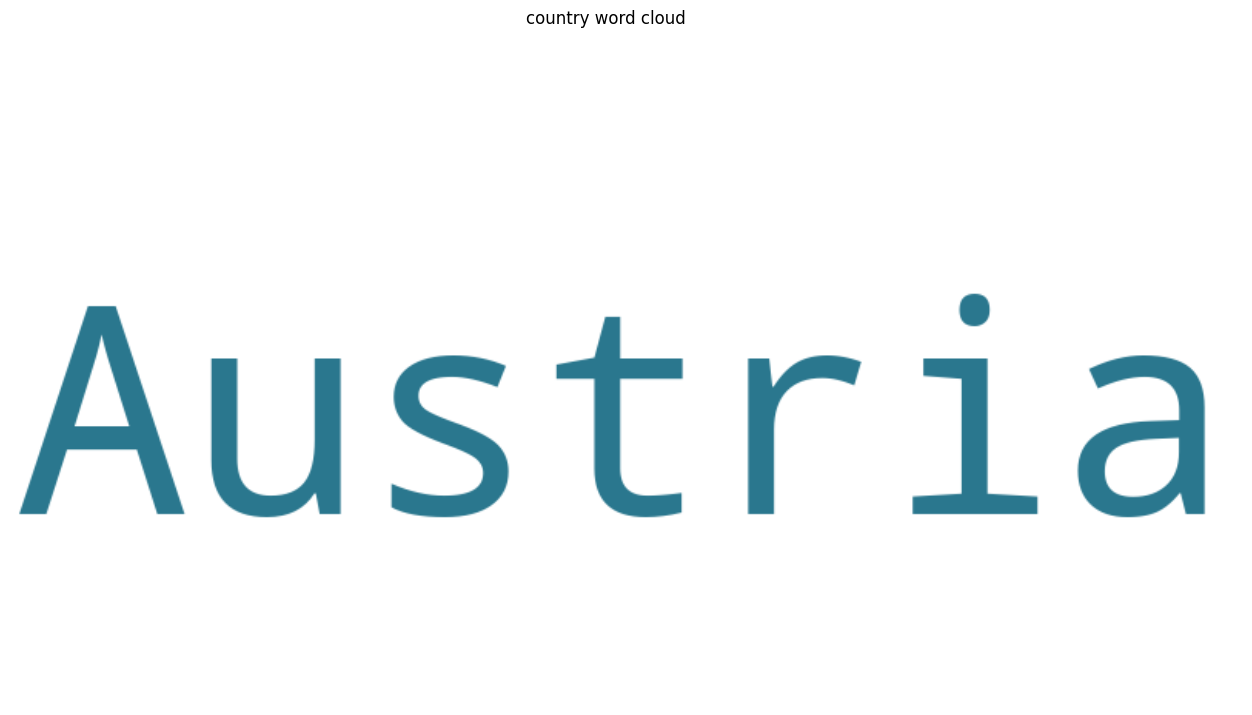

In [18]:
series_to_wordcloud(pii_df.country)

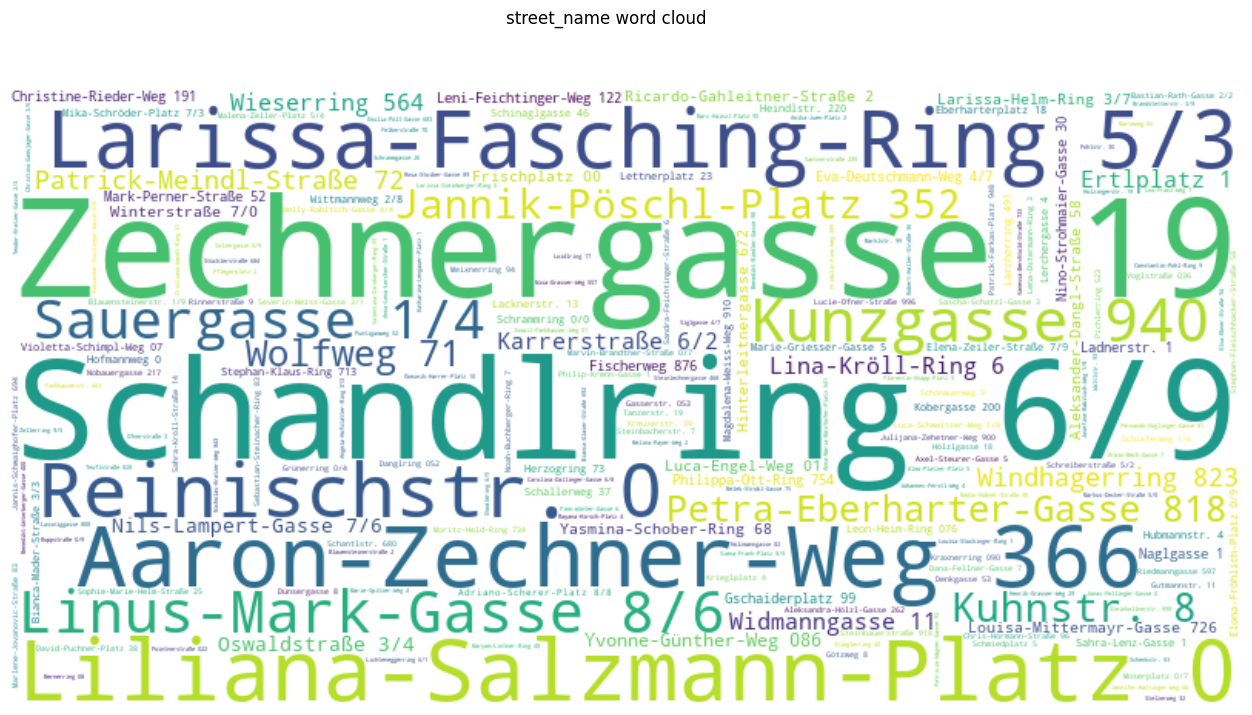

In [19]:
series_to_wordcloud(pii_df.street_name)

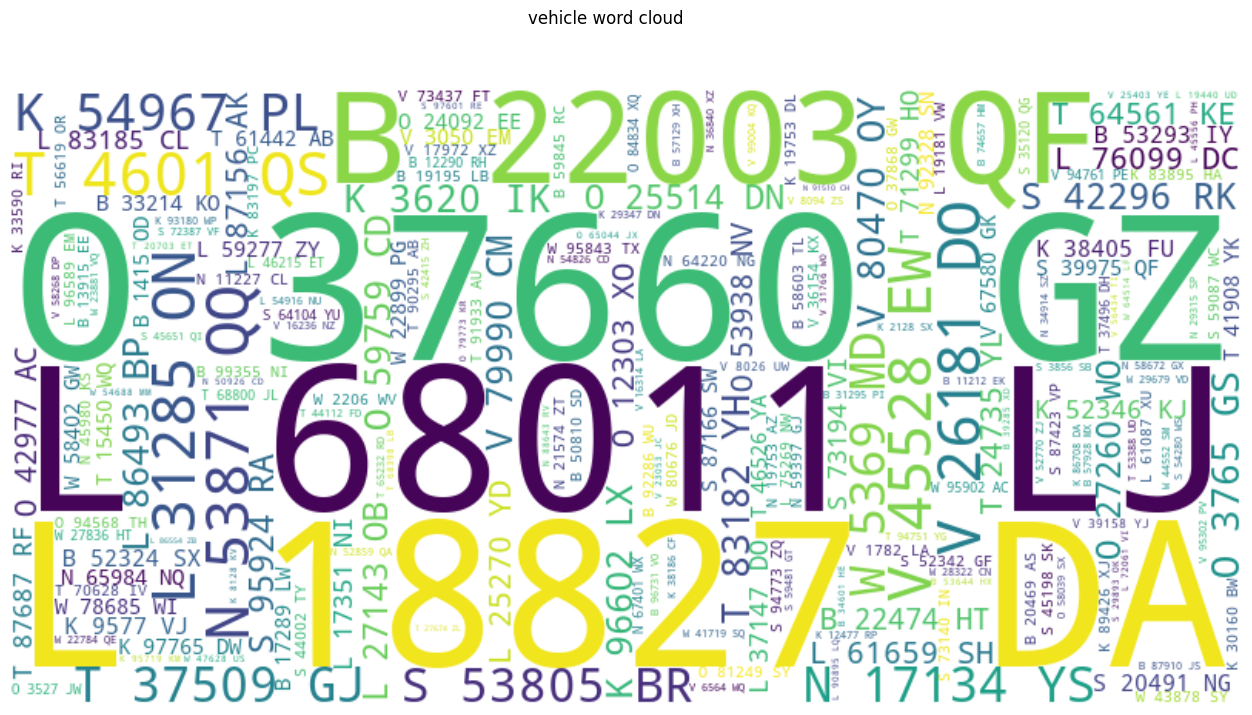

In [20]:
series_to_wordcloud(pii_df.vehicle)

2. Evaluate different entities in the synthetic dataset after creation

In [22]:
synth = InputSample.read_dataset_json("data/generated_size_1500_date_April_07_2025.json", token_model_version="de_core_news_sm")

loading model de_core_news_sm


tokenizing input: 100%|██████████| 1500/1500 [00:14<00:00, 102.95it/s]


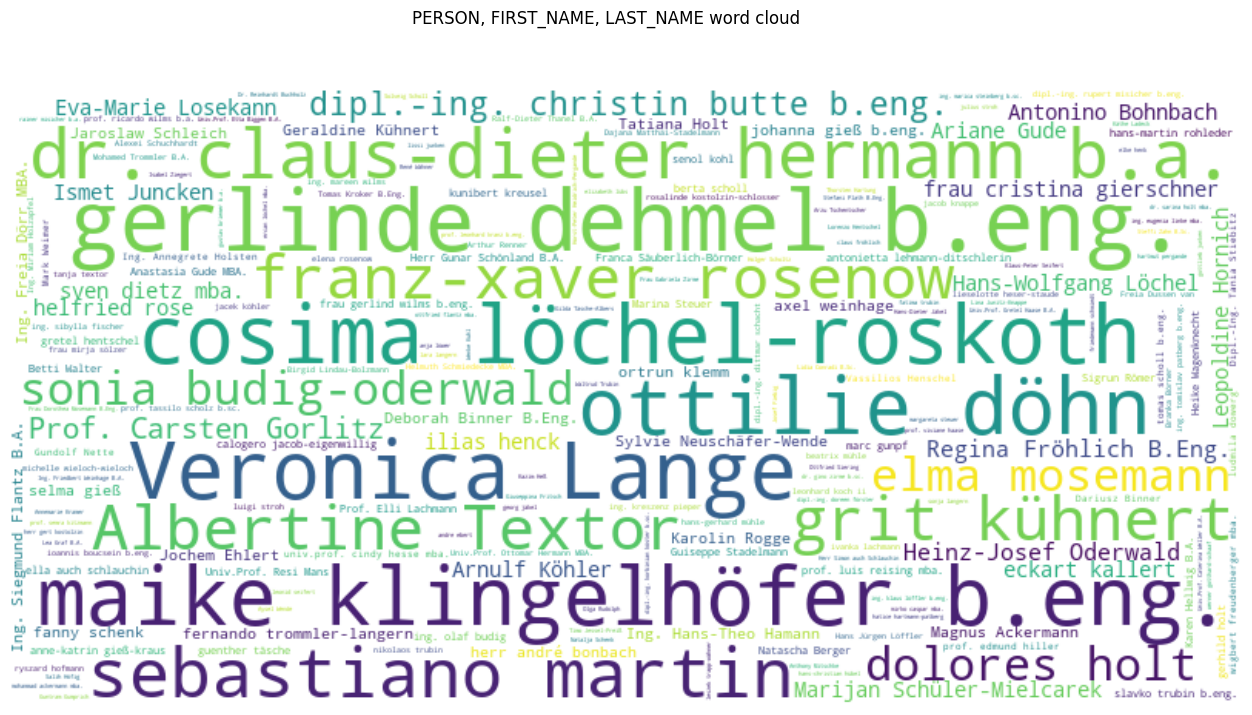

In [23]:
def get_entity_values_from_sample(sample, entity_types):
    name_entities = [
        span.entity_value for span in sample.spans if span.entity_type in entity_types
    ]
    return name_entities


names = [
    get_entity_values_from_sample(sample, ["PERSON", "FIRST_NAME", "LAST_NAME"])
    for sample in synth
]
names = [item for sublist in names for item in sublist]
series_to_wordcloud(pd.Series(names, name="PERSON, FIRST_NAME, LAST_NAME"))

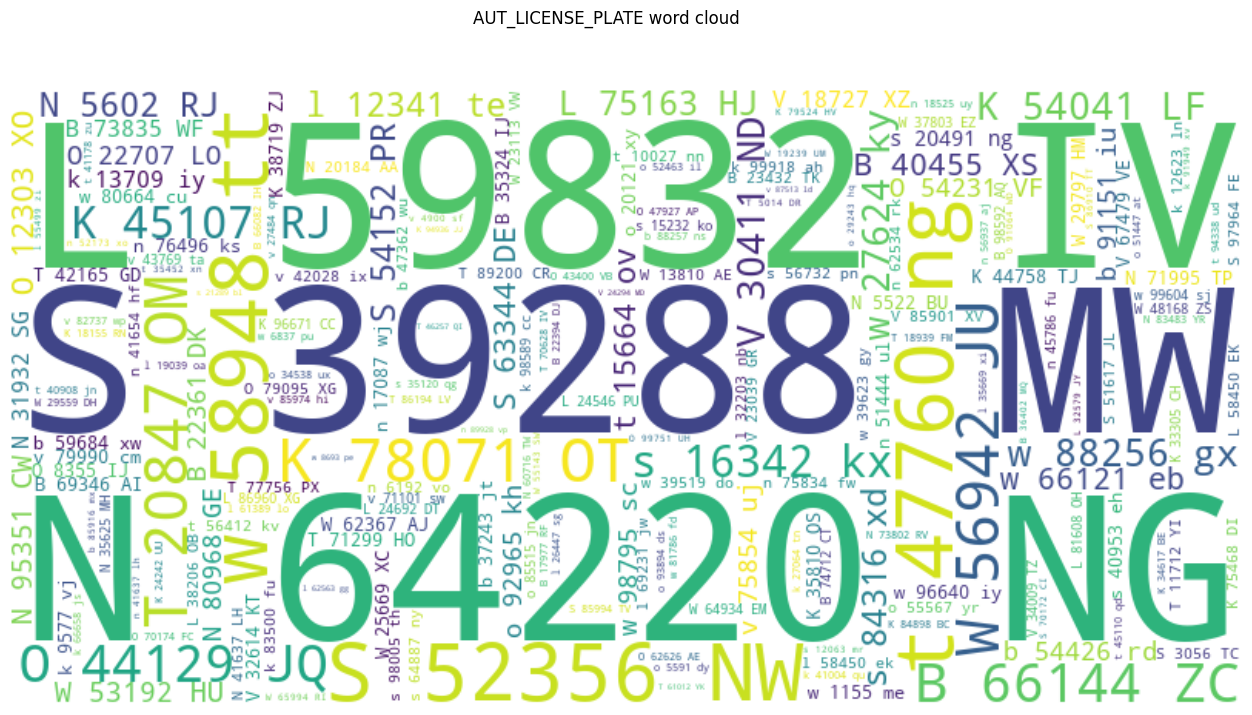

In [26]:
orgs = [get_entity_values_from_sample(sample, ["AUT_LICENSE_PLATE"]) for sample in synth]
orgs = [item for sublist in orgs for item in sublist]
series_to_wordcloud(pd.Series(orgs, name="AUT_LICENSE_PLATE"))